In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Fuel_Consumption/FuelConsumption.csv")

In [ ]:
data.head(2)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205


# Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [ ]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [ ]:
data.duplicated().sum()

1

In [ ]:
data.isna().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [ ]:
data.drop(columns=['Year'], inplace=True)
data.drop_duplicates(inplace=True)

# Data Insight

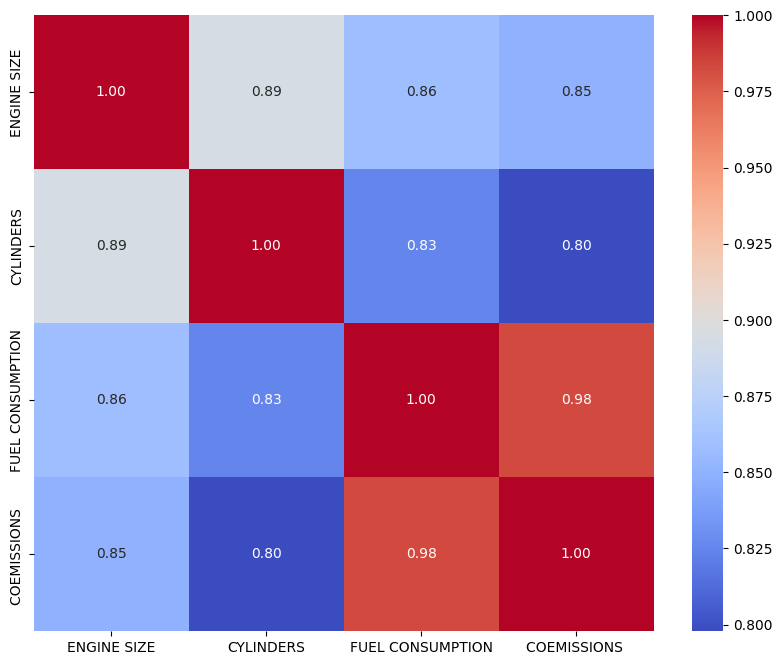

In [ ]:
# melihat korelasi antar variabel numerik
data_intijer = data.select_dtypes(include=[np.number])
korelasi = data_intijer.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

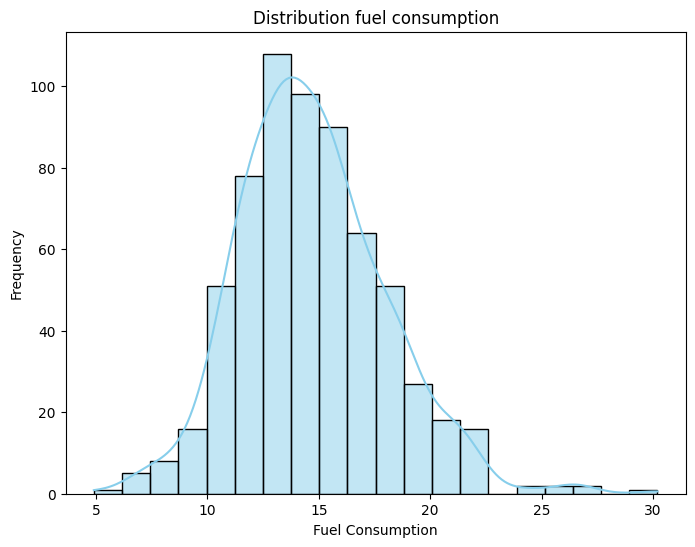

In [ ]:
# melihat sebaran konsumsi bahan bakar
plt.figure(figsize=(8, 6))
sns.histplot(data["FUEL CONSUMPTION"], kde=True, bins=20, color="skyblue")
plt.title("Distribution fuel consumption")
plt.xlabel("Fuel Consumption")
plt.ylabel("Frequency")
plt.show()


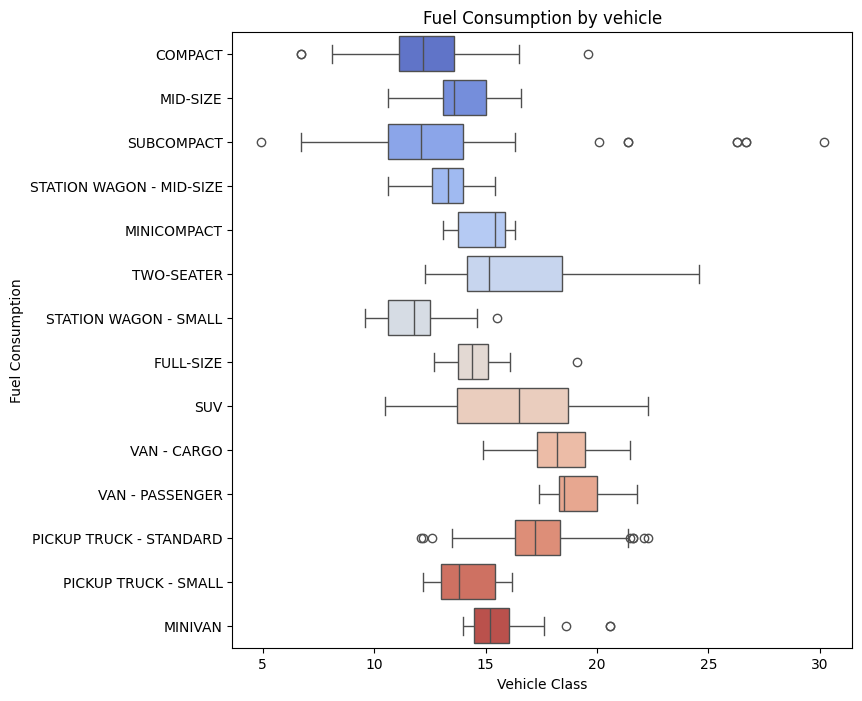

In [ ]:
# melihat konsumsi bahan bakar berdasarkan jenis mobil
plt.figure(figsize=(8, 8))
sns.boxplot(y='VEHICLE CLASS', x='FUEL CONSUMPTION', data=data, palette="coolwarm")
plt.title("Fuel Consumption by vehicle")
plt.xlabel("Vehicle Class")
plt.ylabel("Fuel Consumption")
plt.show()


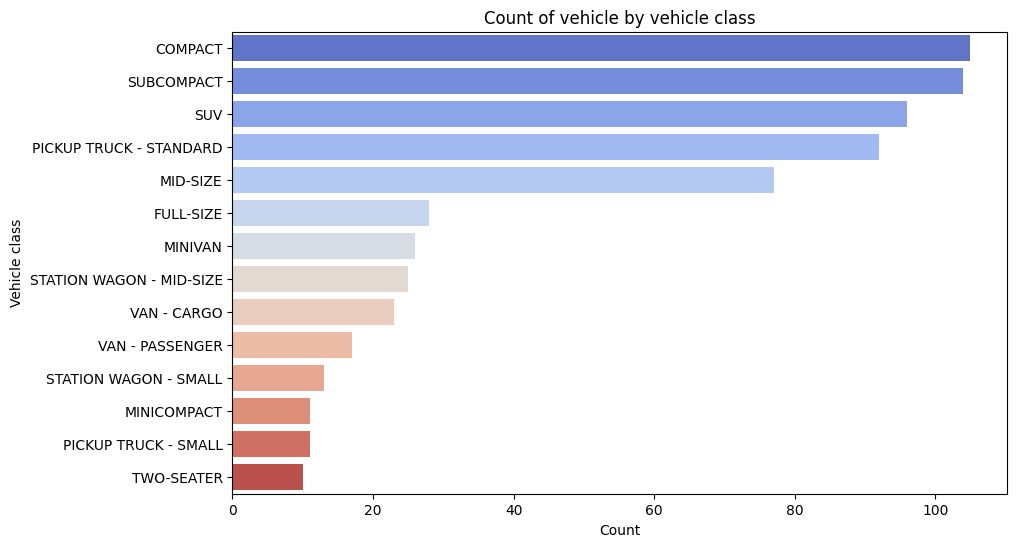

In [ ]:
# menghitung jumlah kendaraan berdasarkan kelasnya
plt.figure(figsize=(10, 6))
sns.countplot(y="VEHICLE CLASS", data=data, order=data["VEHICLE CLASS"].value_counts().index, palette="coolwarm")
plt.title("Count of vehicle by vehicle class")
plt.xlabel("Count")
plt.ylabel("Vehicle class")
plt.show()

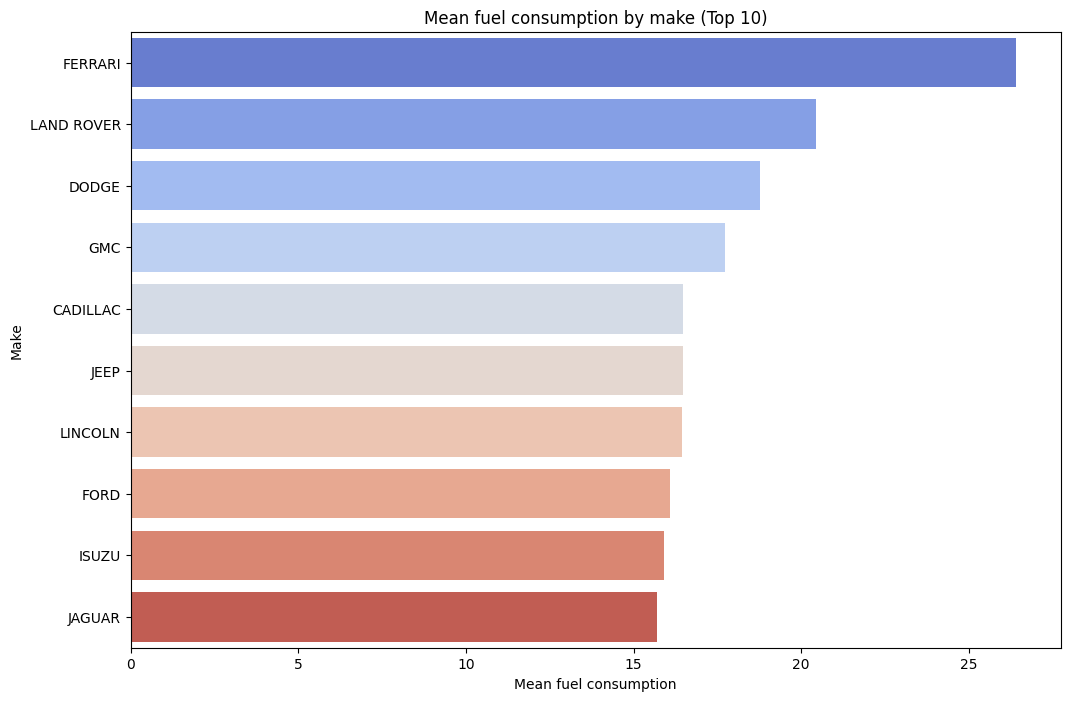

In [ ]:
# melihat top 10 penggunaan bahan bakar terbanyak berdasarkan merk
plt.figure(figsize=(12, 8))
mean_fuel_consumption_by_make = data.groupby("MAKE")["FUEL CONSUMPTION"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=mean_fuel_consumption_by_make.values, y=mean_fuel_consumption_by_make.index, palette="coolwarm")
plt.title("Mean fuel consumption by make (Top 10)")
plt.xlabel("Mean fuel consumption")
plt.ylabel("Make")
plt.show()

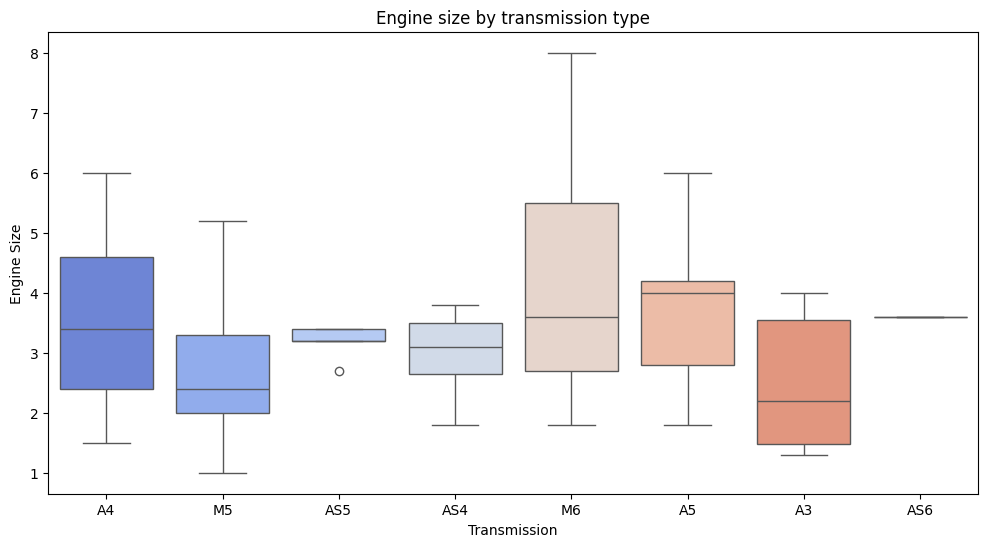

In [ ]:
# melihat engine size berdasarkan transmission
plt.figure(figsize=(12, 6))
sns.boxplot(x="TRANSMISSION", y="ENGINE SIZE", data=data, palette="coolwarm")
plt.title("Engine size by transmission type")
plt.xlabel("Transmission")
plt.ylabel("Engine Size")
plt.show()


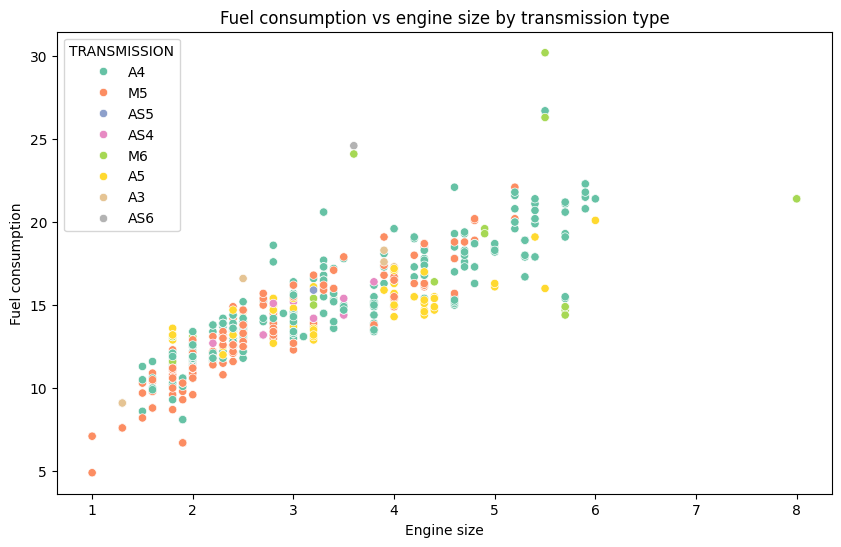

In [ ]:
# melihat sebaran jenis transmission berdasarkan fuel consumption dan engine size
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ENGINE SIZE", y="FUEL CONSUMPTION", hue="TRANSMISSION", data=data, palette="Set2")
plt.title("Fuel consumption vs engine size by transmission type")
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.show()

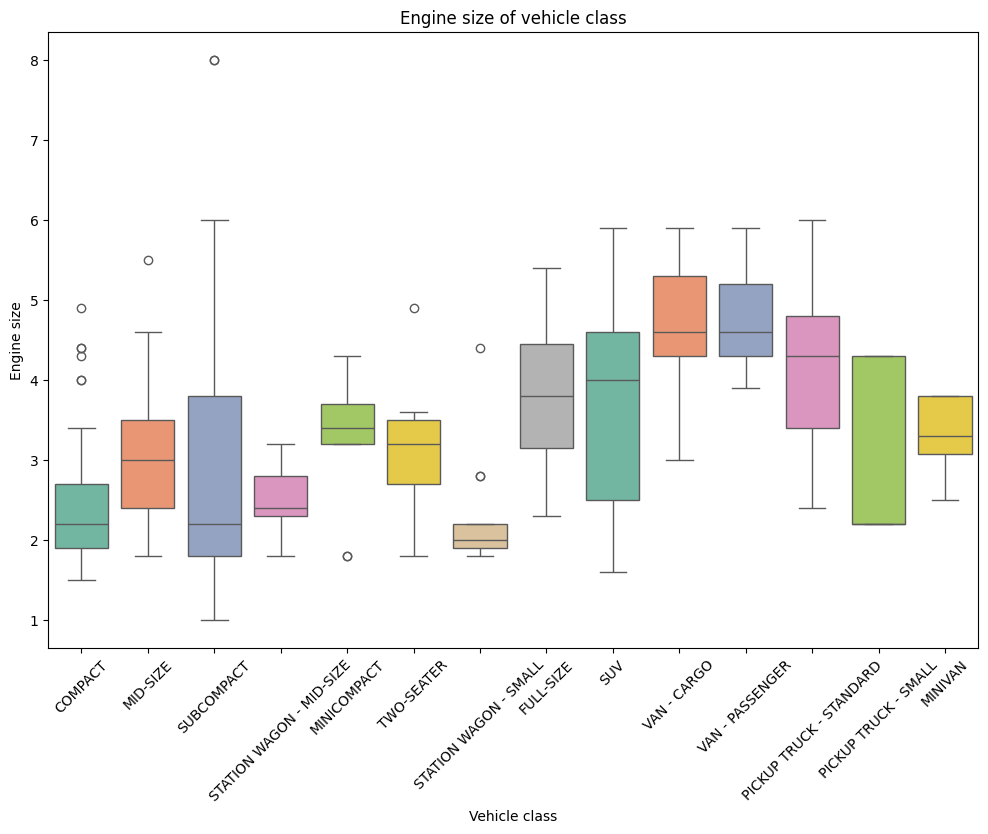

In [ ]:
# melihat engine size berdasarkan jenis kendaraan
plt.figure(figsize=(12, 8))
sns.boxplot(x="VEHICLE CLASS", y="ENGINE SIZE", data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Engine size of vehicle class")
plt.xlabel("Vehicle class")
plt.ylabel("Engine size")
plt.show()

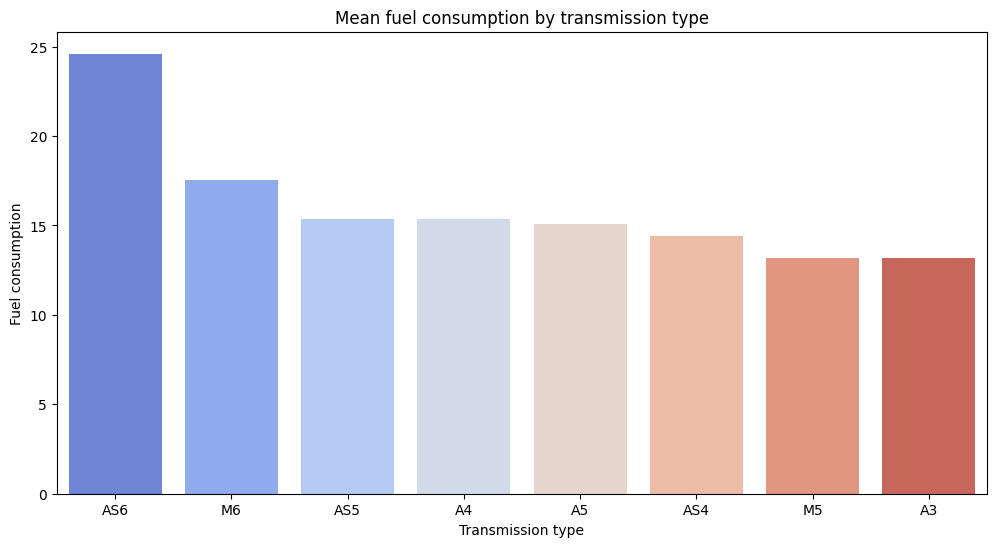

In [ ]:
# melihat rata rata penggunaan bahan bakar berdasarkan transmission type
mean_fuel_consumption_by_transmission = data.groupby("TRANSMISSION")["FUEL CONSUMPTION"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_fuel_consumption_by_transmission.index, y=mean_fuel_consumption_by_transmission.values, palette="coolwarm")
plt.title("Mean fuel consumption by transmission type")
plt.xlabel("Transmission type")
plt.ylabel("Fuel consumption")
plt.show()

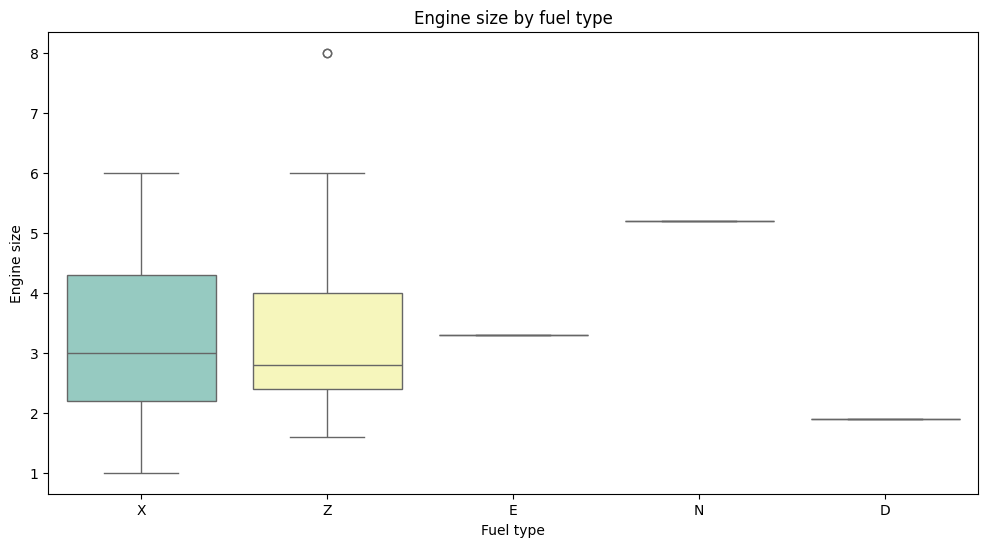

In [ ]:
# menampilkan engine size berdasarkan tipe bahan bakar
plt.figure(figsize=(12,6))
sns.boxplot(x="FUEL", y="ENGINE SIZE", data=data, palette="Set3")
plt.title("Engine size by fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Engine size")
plt.show()

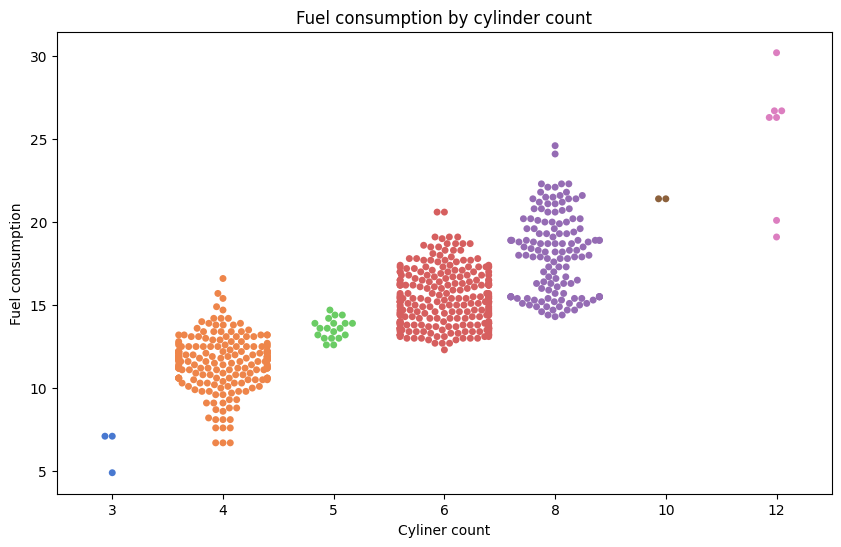

In [ ]:
# menampilkan konsumsi bahan bakar berdasarkan jumlah silinder
plt.figure(figsize=(10, 6))
sns.swarmplot(x="CYLINDERS", y="FUEL CONSUMPTION", data=data, palette="muted")
plt.title("Fuel consumption by cylinder count")
plt.xlabel("Cyliner count")
plt.ylabel("Fuel consumption")
plt.show()
